# **Project Name**    - Tata Steel machine performance analysis



 **Project Type**    - EDA
 
 **Contribution**    - Individual

 **Name** - Tanveer khan



# **Project Summary -**
This project aims to analyze and optimize the machine performance at Tata Steel using data analytics techniques. The goal is to enhance operational efficiency, reduce downtime, and predict equipment failures before they occur, enabling a shift towards predictive maintenance.

The primary focus of the project is on examining the performance of various machines within Tata Steel’s production line by leveraging historical machine data. Key factors like air temperature, process temperature, rotational speed, torque, tool wear, and machine failures are considered to gain insights into machine health and performance. 

Key Objectives:

* Predictive Maintenance: Using machine learning models to predict potential machine failures based on historical data, reducing unplanned downtime.
* Data-Driven Insights: Visualizing and analyzing machine data to identify patterns and correlations between operational variables and machine failure.
* Optimization of Performance: Utilizing data analytics to fine-tune machine settings for improved performance and energy efficiency.
* Improvement in Operational Efficiency: By identifying potential weak points in the system, ensuring that the machines operate at peak performance, thus improving overall productivity.

Approach:

* Data Collection and Preprocessing: Collect data from machines (including temperature, speed, torque, and wear) and preprocess it by handling missing values, encoding categorical variables, and normalizing features.

* Exploratory Data Analysis (EDA): Visualizing the distribution of features and relationships between variables using statistical graphs such as histograms, box plots, scatter plots, and correlation matrices.

Expected Outcomes: 

* A predictive model that can identify machines likely to fail, allowing for proactive maintenance.
* Insights into the relationships between operational conditions (like temperature and speed) and machine performance.
* A visualization dashboard to track real-time performance and failure predictions.


This project will empower Tata Steel with data-driven decisions for improving machine reliability, reducing maintenance costs, and increasing the overall efficiency of the production line.

# **GitHub Link -** 
https://github.com/Tanveerr97/EDA_Submission.ipynb/blob/main/Tata_Steel_machine_performance_analysis.ipynb

# **Problem Statement**

"The goal of this analysis is to explore Tata Steel's machine performance data to understand factors contributing to machine failures. By examining key features like torque, rotational speed, and temperature, we aim to identify patterns that lead to machine breakdowns and develop data-driven strategies to enhance predictive maintenance and reduce operational downtime."



### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px



### Dataset Loading

In [32]:
data = pd.read_csv(r"c:\Users\tanve\Desktop\dataset\project_1\train (2).csv")

### Dataset First View

In [33]:
data.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


### Dataset Rows & Columns count

In [34]:

count = data.shape
count


(136429, 14)

### Dataset Information

In [35]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [36]:

duplicate_count = data[data.duplicated()].sum()
duplicate_count

id                           0
Product ID                   0
Type                         0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]       0
Torque [Nm]                0.0
Tool wear [min]              0
Machine failure              0
TWF                          0
HDF                          0
PWF                          0
OSF                          0
RNF                          0
dtype: object

#### Missing Values/Null Values

In [37]:

missing_values = data.isnull().sum()
missing_values

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### What did you know about your dataset?
This dataset appears to contain machine performance data related to manufacturing or industrial processes. Here's a breakdown of the columns:

1. Dataset Overview

The concerned dataset considered is train.csv.

Train set contains 136,429 rows and 14 columns

The target variable is (Machine failure)

2. Features in the Dataset

    The dataset includes machine sensor readings and operational data, such as:

* ID Columns: id, Product ID, Type (categorical).

* Sensor Readings:

Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]

* Failure Indicators:

TWF (Tool Wear Failure)
HDF (Heat Dissipation Failure)
PWF (Power Failure)
OSF (Overstrain Failure)
RNF (Random Failure)

* Target Variable: Machine failure (only in the train set)


## ***2. Understanding Your Variables***

* Operational factors like temperature, speed, torque, and tool wear are crucial in determining machine health. Higher values in these columns could signal stress on the machine, leading to failure.


* Failure types help in understanding the reasons behind breakdowns. Predicting failures based on operational parameters (e.g., high torque, tool wear) could prevent unexpected downtimes.


This dataset could be used for machine condition monitoring, predictive maintenance, and understanding the relationship between operational variables and machine failures. You might want to focus on predictive modeling techniques to forecast machine failures based on these variables.

In [38]:
# Dataset Describe
data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
column_names = list(data.columns)
column_names

['id',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Variables Description
Here’s a detailed description of each variable in your dataset, based on the provided statistics:

1. id: 

Description: A unique identifier for each record in the dataset.

Type: Integer

Role: Identifier

2. Air temperature [K]:

Description: The temperature of the air surrounding the machine or operation, measured in Kelvin (K).

Type: Continuous (Numeric)

Range: 295.30 K to 304.40 K

Role: Environmental variable that may influence machine performance.

3. Process temperature [K]:

Description: The temperature within the machine or the process being performed, measured in Kelvin (K).

Type: Continuous (Numeric)

Range: 305.80 K to 313.80 K

Role: A critical operational parameter influencing machine efficiency and wear.

4. Rotational speed [rpm]:

Description: The rotational speed of the machine, measured in revolutions per minute (rpm).

Type: Continuous (Numeric)

Range: 1181 rpm to 2886 rpm

Role: Represents the speed at which the machine’s components are rotating, which affects tool wear and machine performance.

5. Torque [Nm]:

Description: The torque applied by the machine's components, measured in Newton-meters (Nm).

Type: Continuous (Numeric)

Range: 3.80 Nm to 76.60 Nm

Role: Indicates the force exerted by the machine. High torque could signal increased stress, contributing to wear or potential failure.

6. Tool wear [min]:

Description: The amount of tool wear over time, measured in minutes (min).

Type: Continuous (Numeric)

Range: 0 min to 253 min

Role: Represents the degradation of tools over time, influencing machine efficiency and failure risk.

7. Machine failure:

Description: A binary indicator for whether a machine failure occurred during the operation (0 = no failure, 1 = failure).

Type: Binary (0 or 1)

Range: 0 to 1

Role: Target variable, indicating whether a failure event occurred.

8. TWF (Tool Wear Failure):

Description: A binary indicator for whether the failure was due to excessive tool wear (0 = no failure, 1 = tool wear failure).

Type: Binary (0 or 1)

Range: 0 to 1

Role: Describes if the failure was caused by tool wear, helping in the analysis of tool maintenance needs.

9. HDF (Heat dissipation failure):

Description: A binary indicator for whether the failure was caused by a hydraulic issue (0 = no failure, 1 = Heat dissipation failure).

Type: Binary (0 or 1)

Range: 0 to 1

Role: Indicates if the failure was related to the hydraulic systems, important for machines with fluid-based components.

10. PWF (Power Failure):

Description: A binary indicator for whether the failure was due to a power issue (0 = no failure, 1 = power failure).
Type: Binary (0 or 1)

Range: 0 to 1

Role: Shows if power failure was a cause, which is useful for diagnosing electrical problems in the system.

11. OSF (Overstrain failure ):

Description: A binary indicator for whether the failure occurred due to the machine being overloaded (0 = no failure, 1 = Overstrain failure ).

Type: Binary (0 or 1)

Range: 0 to 1

Role: Indicates failure caused by exceeding machine capacity, useful for preventing overuse or strain.

12. RNF (Random Failure):

Description: A binary indicator for whether the failure was random or unexpected (0 = no failure, 1 = random failure).

Type: Binary (0 or 1)

Range: 0 to 1

Role: Reflects unanticipated failures that do not have a clear cause and can be difficult to predict or prevent.

### Check Unique Values for each variable.

In [40]:

data.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [41]:


# Drop rows with missing values (or columns if too many missing)
df = data.dropna()
  


# Save the cleaned and prepared dataset

df.to_csv("analysis_ready_data.csv", index=False)




analysis_data = pd.read_csv(r"analysis_ready_data.csv")


analysis_data.info()  # Data types and shape after wrangling
analysis_data.head()  # Preview the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### What all manipulations have you done and insights you found?

Answer Here.

# Data Manipulations:

* Dropped Missing Values:

Used dropna() to remove rows with missing values to avoid issues during model training.


* Saved Cleaned Data:

Saved the cleaned and transformed dataset as "analysis_ready_data.csv" for future use.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



## KDE Plot Comparison of Numerical Features: Train vs. Test Data

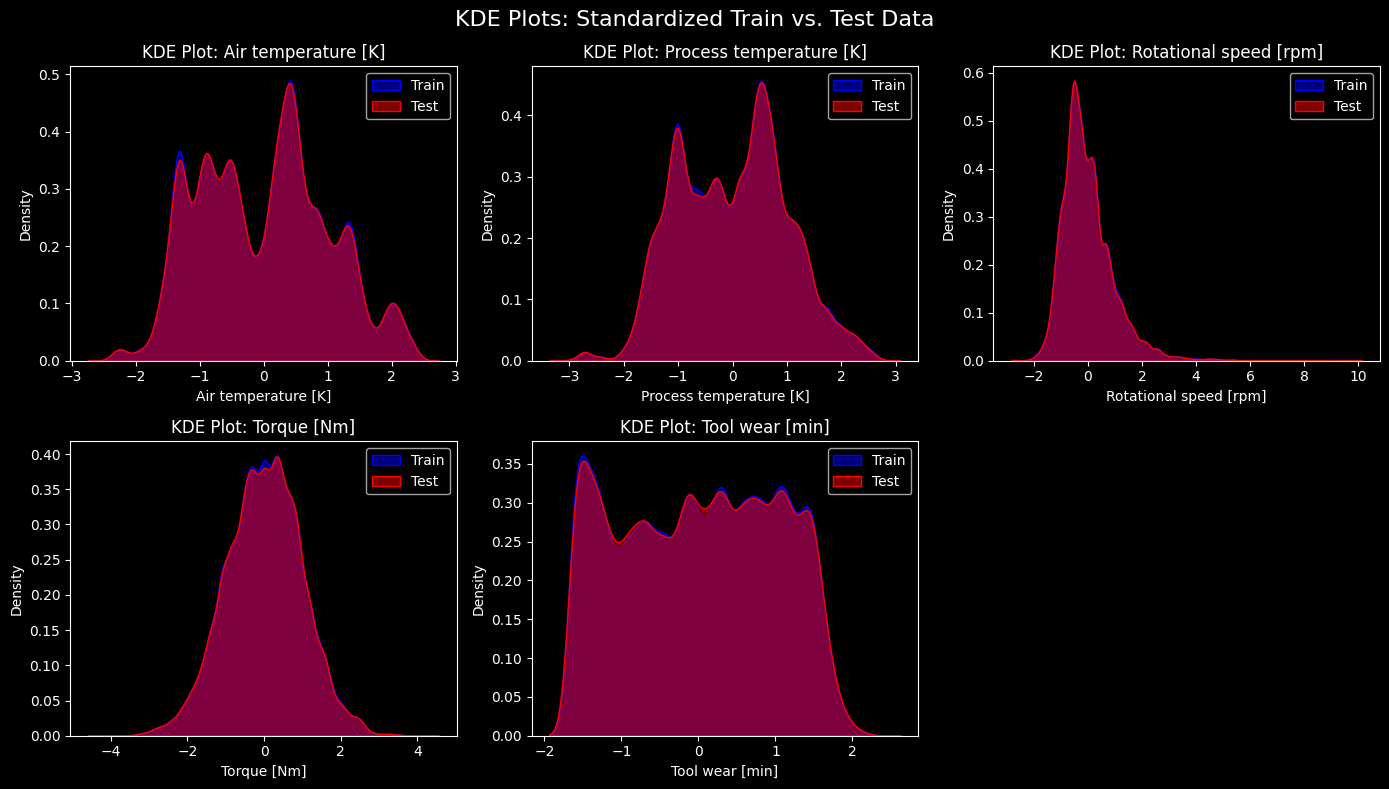

In [42]:

train_data = analysis_data.copy()

# Read and preprocess test data

test_data = pd.read_csv(r"c:\Users\tanve\Desktop\dataset\project_1\test (1).csv")
test_data = test_data.dropna().drop_duplicates()


plt.style.use('dark_background')

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 
                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Standardize numerical features using the same scaler for train and test data

scaler = StandardScaler()

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

test_data[numerical_features] = scaler.transform(test_data[numerical_features])



plt.figure(figsize=(14, 8))
plt.suptitle('KDE Plots: Standardized Train vs. Test Data', fontsize=16)

for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)

    
    sns.kdeplot(train_data[column], label='Train', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(test_data[column], label='Test', fill=True, color='red', alpha=0.5)
    
    plt.title(f'KDE Plot: {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    

    plt.grid(False)

plt.tight_layout()

plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.  

I chose the KDE (Kernel Density Estimation) plot because it provides a smooth, continuous representation of the distribution of data, allowing us to visually compare the distribution of numerical features across the training and test datasets. This helps in identifying differences in distribution shapes, whether they are similar or if there are discrepancies that might need to be addressed before building predictive models.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

The insight from the chart indicates that the training data has a higher concentration or more "peaked" distributions compared to the test data for most of the numerical features. This suggests that the training set may have a wider spread or higher variance in certain features, while the test set may be more evenly distributed or have a narrower range

* Choosing the training data for EDA is important because it allows for proper model preparation, prevents data leakage, and ensures that feature engineering and model decisions are based on data the model will learn from, keeping the test data unbiased for evaluation.

#### Chart - 1

Histogram  - "Distribution of Key Machine Operational Features"

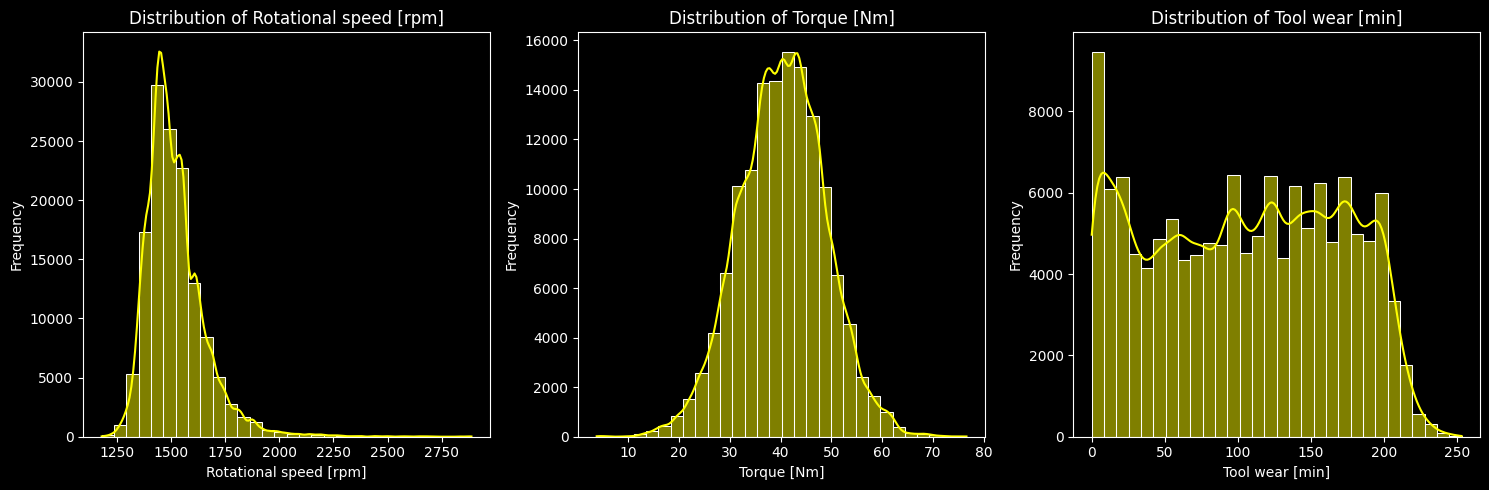

In [43]:

plt.style.use('dark_background')


numerical_features = ['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(analysis_data[column], kde=True, bins=30, color='yellow')
    plt.title(f'Distribution of {column}', color='white')
    plt.xlabel(column, color='white')
    plt.ylabel('Frequency', color='white')
    
    
    plt.grid(False)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here. 

"I chose histograms with KDE because they effectively visualize the shape, central tendency, and spread of numerical features, helping to understand data distribution and identify patterns."



##### 2. What is/are the insight(s) found from the chart?

Answer Here. 

The histograms with KDE revealed the distribution patterns of numerical features:

Rotational speed [rpm] is negatively skewed, indicating machines mostly operate at high speeds.
Torque [Nm] follows a normal distribution, suggesting consistent operational loads.
Tool wear [min] shows a uniform distribution, indicating steady tool degradation over time.










##### 3. Will the gained insights help creating a positive business impact?


Answer Here. 

Yes, the insights can create a positive business impact by optimizing machine operations and  maintenance. The skewed distribution of rotational speed helps identify ideal operational ranges for efficiency, while consistent torque and uniform tool wear trends support better maintenance scheduling to reduce downtime. 



#### Chart - 2

"Density Plot of Temperature Features".

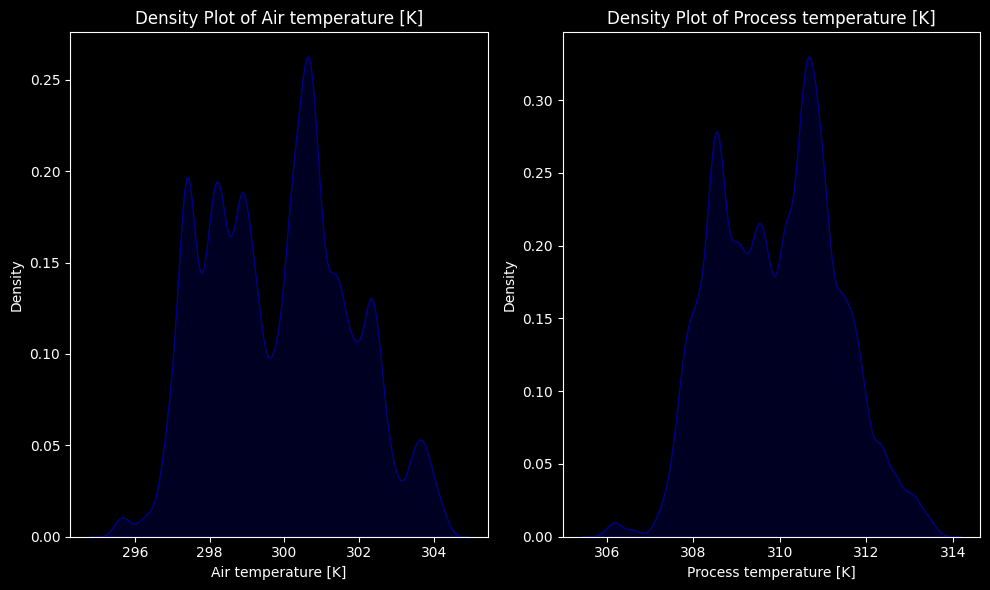

In [44]:

plt.style.use('dark_background')


plt.figure(figsize=(10, 6))

for i, column in enumerate(['Air temperature [K]', 'Process temperature [K]'], 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(analysis_data[column], fill=True, color='darkblue')  
    plt.title(f'Density Plot of {column}', color='white') 
    plt.xlabel(column, color='white')  
    plt.ylabel('Density', color='white')  
    
   
    plt.grid(False)

plt.tight_layout()
plt.show()

 

##### 1. Why did you pick the specific chart?

Answer Here.  

I chose the Density Plot (KDE) for 'Air temperature [K]' and 'Process temperature [K]' because it offers a smooth and continuous representation of the distribution of these variables.  By comparing both temperature variables in this way, we can gain insights into how they might relate to machine failure and adjust operational settings accordingly, improving machine performance and predictive maintenance strategies.




##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

From the Density Plots (KDE) of 'Air temperature [K]' and 'Process temperature [K]', we can see:

Air Temperature: The 'Air temperature [K]' has a multimodal distribution, meaning it has multiple peaks. This suggests that the air temperature behaves differently during certain operations or conditions, possibly due to changes in machine processes or the environment.

Process Temperature: The 'Process temperature [K]' shows a bimodal distribution, meaning it has two main peaks. This might indicate two different stages in the machine's operation, such as heating and cooling, which affect the temperature in different ways.

These insights help us understand how temperature changes during different machine operations, which can guide maintenance and improve performance.




##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  


Yes, the insights from the Density Plots of 'Air temperature [K]' and 'Process temperature [K]' can positively impact the business. Understanding the multimodal distribution of air temperature helps identify different operational phases, allowing for more targeted maintenance and operational adjustments. Similarly, the bimodal distribution of process temperature suggests distinct heating and cooling phases, which can help in optimizing machine performance and preventing failures. By adjusting operations based on these insights, businesses can reduce downtime, improve efficiency, and extend equipment life, leading to cost savings and better productivity.


#### Chart - 3
Distribution of Machine Types

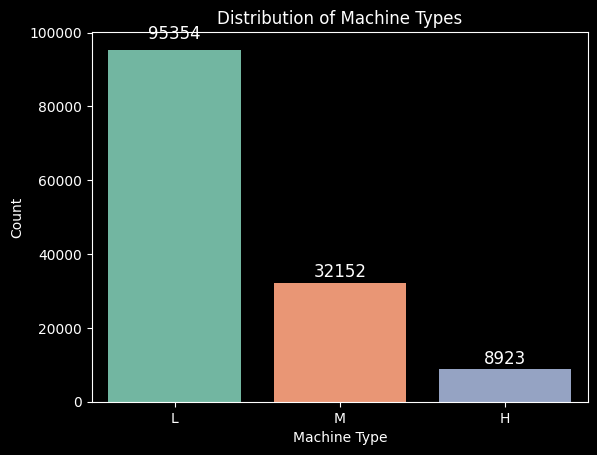

In [45]:

# Create a count plot for machine types with different colors for each bar
ax = sns.countplot(x='Type', data=analysis_data, hue='Type', palette='Set2', legend=False)

plt.title('Distribution of Machine Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')

# Display count values directly on top of the bars

for p in ax.patches:
    height = p.get_height()
    
    ax.annotate(f'{int(height)}',(p.get_x() + p.get_width() / 2., height + 0.02 * height),ha='center', va='bottom',fontsize=12, color='white')  

plt.grid(False)

plt.show()





##### 1. Why did you pick the specific chart?

Answer Here.  

I chose a count plot because it effectively visualizes the frequency distribution of categorical data, allowing for an easy comparison of the different machine types in the dataset.



##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

The chart shows that the L type machines are the most common with 95,354 units, followed by M type machines with 32,152 units, and H type machines with 8,923 units. This insight helps understand the distribution of machine types in the dataset, which is useful for analyzing performance and failure patterns across different machine categories.



##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

Yes, understanding the distribution of machine types can help businesses allocate resources efficiently, tailor maintenance strategies for high-volume machine types, and prioritize efforts where the impact on productivity and cost savings will be greatest.



#### Chart - 4
Torque vs. Rotational Speed

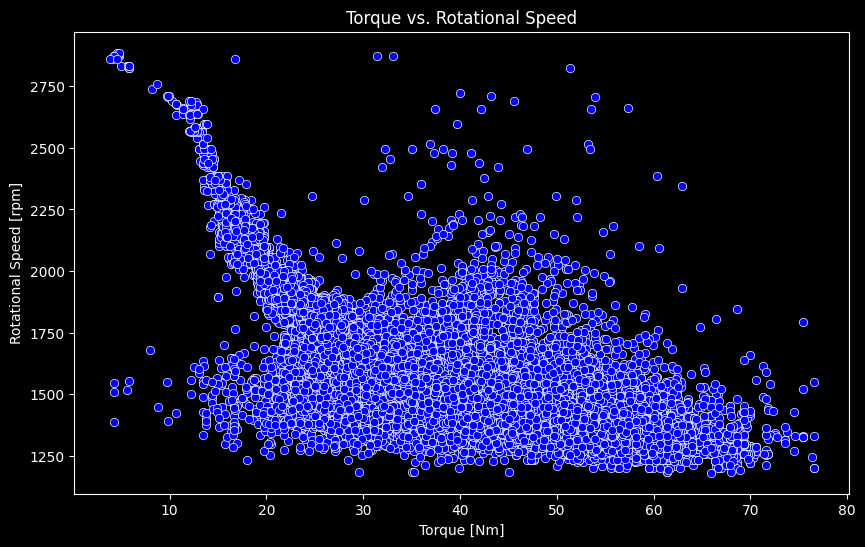

In [46]:

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]', data=analysis_data, color='blue')

plt.title('Torque vs. Rotational Speed')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational Speed [rpm]')
plt.grid(False)
plt.show() 

##### 1. Why did you pick the specific chart?

Answer Here.  

a Scatter Plot to visualize the relationship between Torque [Nm] and Rotational Speed [rpm] . The plot will help identify trends, correlations, and potential outliers between these two numerical features.












##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

Negative Correlation: There seems to be an inverse relationship between Torque and Rotational Speed. As the Torque increases, the Rotational Speed tends to decrease.



##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

The insights gained from this chart can guide operational adjustments and maintenance strategies that can lead to improved machine efficiency, reduced downtime, and lower maintenance costs, all of which directly contribute to a positive business impact.


#### Chart - 5



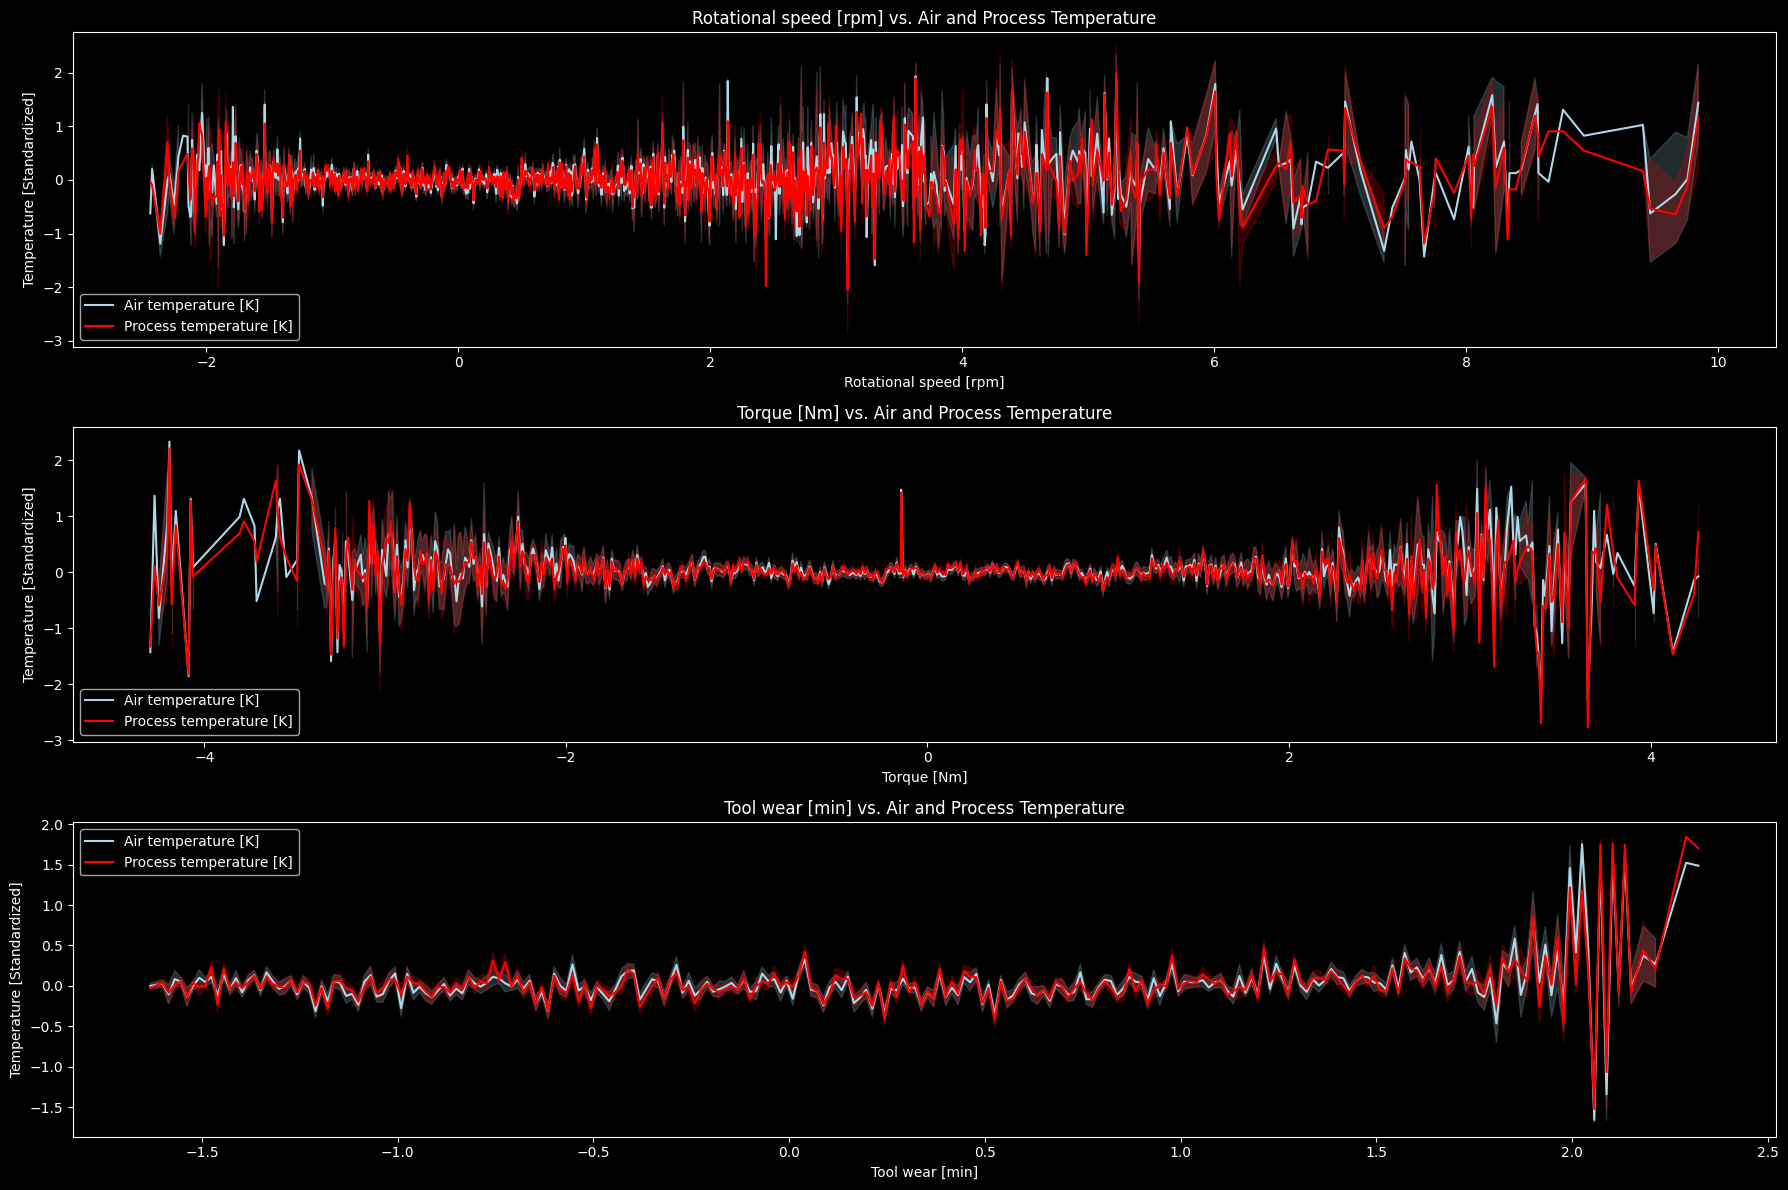

In [47]:

plt.style.use('dark_background')

# Standardize the data for consistent scaling
scaler = StandardScaler()
analysis_data[['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
               'Air temperature [K]', 'Process temperature [K]']] = scaler.fit_transform(
    analysis_data[['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 
                   'Air temperature [K]', 'Process temperature [K]']])



features = [
    ('Rotational speed [rpm]', 'Air temperature [K]', 'Process temperature [K]'),
    ('Torque [Nm]', 'Air temperature [K]', 'Process temperature [K]'),
    ('Tool wear [min]', 'Air temperature [K]', 'Process temperature [K]')
]



plt.figure(figsize=(18, 12))

for i, (x_feature, y_feature1, y_feature2) in enumerate(features, 1):
    plt.subplot(3, 1, i)  
    sns.lineplot(x=analysis_data[x_feature], y=analysis_data[y_feature1], label=f'{y_feature1}', color='lightblue')
    sns.lineplot(x=analysis_data[x_feature], y=analysis_data[y_feature2], label=f'{y_feature2}', color='red')
    
    plt.title(f'{x_feature} vs. Air and Process Temperature', color='white')  
    plt.xlabel(x_feature, color='white')  
    plt.ylabel('Temperature [Standardized]', color='white')  
    plt.legend()
    plt.grid(False)  
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.  

I selected line plots because they are ideal for trend analysis, allowing for easy visualization of how machine parameters (like rotational speed, torque, and tool wear) relate to air and process temperatures over a range. They provide a clear comparison between features, highlighting interactions and correlations. 



##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

From the line plots, it can be seen that:

Tool Wear mostly falls between 1.5 and 2.5 standard deviations, indicating consistent wear, which suggests focusing maintenance in this range to prevent excessive degradation.

Torque values fluctuate between -2 to -4 and 2 to 4 standard deviations, indicating varying stress levels. Monitoring and maintaining torque within these ranges is key to ensuring machine stability and avoiding failures.




##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

Yes, the insights will have a positive business impact by optimizing maintenance, ensuring machine stability, and reducing costs. 


#### Chart - 6

Process Temperature by Machine Type

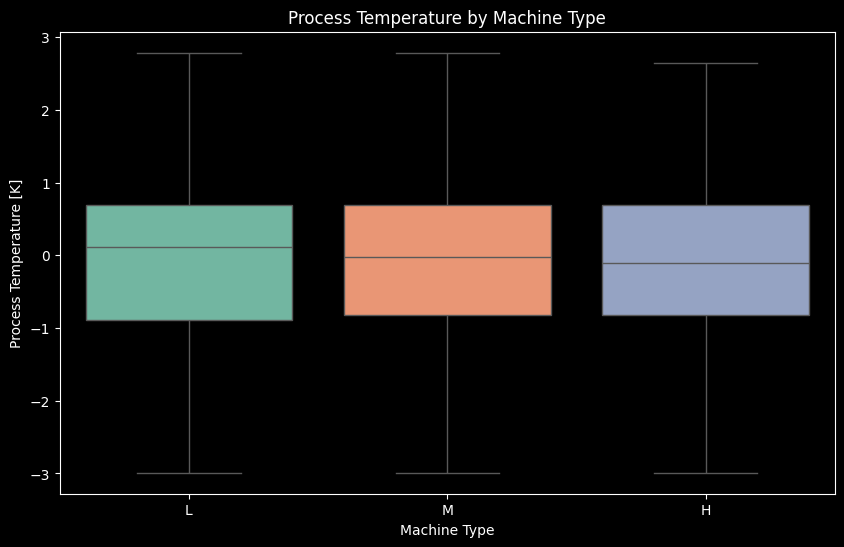

In [48]:

plt.figure(figsize=(10, 6))


sns.boxplot(x='Type', y='Process temperature [K]', data=analysis_data, hue='Type', palette='Set2', legend=False)

plt.title('Process Temperature by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Process Temperature [K]')
plt.grid(False) 
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.  

I chose the Boxplot because it effectively visualizes the distribution of process temperature across different machine types, highlighting the central tendency, spread, and outliers. It allows easy comparison of temperature variations, detects anomalies, and helps in understanding operational consistency and potential issues for each machine type.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

* Machine Type 'H' (Low Temperature):

Median Process Temperature: Below 310K, indicating typical operations at lower temperatures than expected.
Implications: Potential for under-performing or more energy-efficient operations, but must be monitored to avoid inefficiency.

* Machine Type 'L' (High Temperature):

Median Process Temperature: Above 310K, indicating operations at higher temperatures.
Implications: Suitable for demanding tasks but requires careful management to avoid overheating and increased maintenance costs.

* Machine Type 'M' (Balanced Temperature):

Median Process Temperature: Around 310K, indicating balanced and optimal operation.
Implications: Consistent and reliable performance, likely with lower maintenance and operational stability.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

The insights gained from the boxplot can positively impact the business by prioritizing maintenance for machines with abnormal temperatures, optimizing resource allocation for cooling or heating systems, and improving overall efficiency by standardizing best practices for machines with stable operating temperatures. These actions can help reduce downtime, extend machine life, and enhance productivity.



#### Chart - 7

Histogram of Numeric Columns

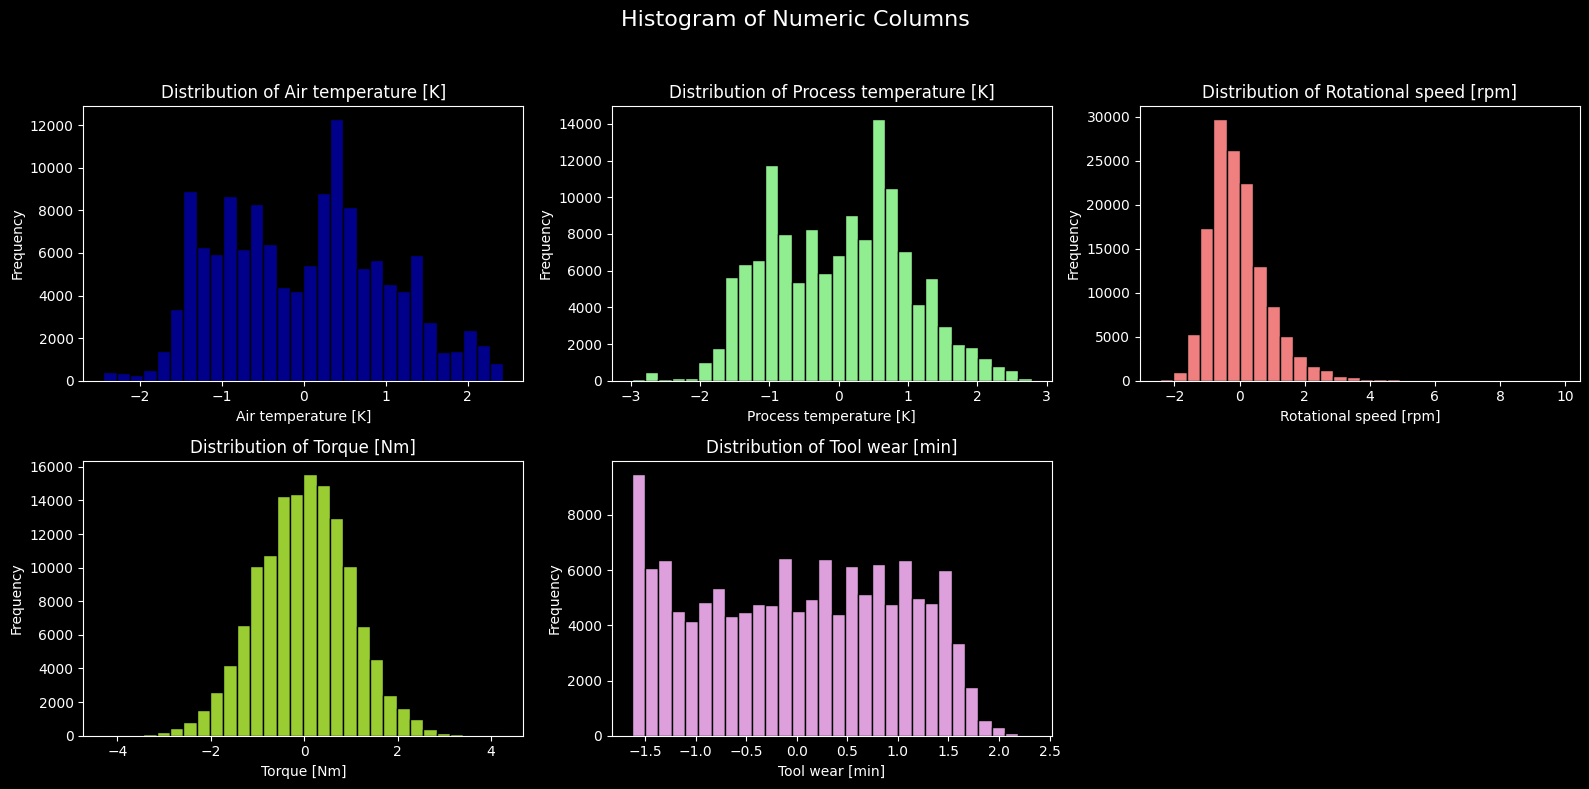

In [49]:

plt.figure(figsize=(16, 8))


columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# List of colors for each histogram
colors = ['darkblue', 'lightgreen', 'lightcoral', 'yellowgreen', 'plum']

# Loop through each column and plot with a different color
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)  
    analysis_data[column].hist(bins=30, color=colors[i-1], edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)  

plt.suptitle('Histogram of Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
 
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here. 

I chose the histogram chart for visualizing numeric columns because histograms are great for showing the distribution of data, especially when  working with continuous variables like temperature, speed, torque, and wear time. 


##### 2. What is/are the insight(s) found from the chart?

Answer Here

the insights are -

1. Air Temperature [K]:

I observe bimodal behavior (two distinct peaks), it indicates that the air temperature experiences two distinct operational phases or environments. This could suggest a system that operates in two different modes, possibly due to changes in environmental conditions or operational states (e.g., cooling and heating cycles).

2. Process Temperature [K]:

its shows a Mostly Normal Distribution means that most of the process temperature values are centered around a specific mean value, with fewer values as you move away from the center.
This indicates that, during normal operations, the process temperature remains relatively stable and consistent within a certain range, suggesting steady control over the process temperature.

3. Rotational Speed [rpm]:

A negatively skewed Rotational Speed [rpm] means most speeds are high, and low speeds are rare. This shows the system usually runs at high speeds, with low speeds happening only occasionally, like during idle or low-load times.

4. Torque [Nm]:

the Torque [Nm] distribution is symmetrically skewed, it means that the data is evenly distributed around the center, forming a bell-shaped curve. This suggests that the torque values are balanced, with most of the readings clustered around the average, and fewer values at the extreme low and high ends. The system likely operates within a consistent torque range.

5. Tool Wear [min]:

the Tool Wear [min] distribution is uniform, it means the wear is spread out evenly across all the time periods. The tool wears at a constant rate, with no periods of faster or slower wear.








##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

Yes, the insights gained from the histograms can create a positive business impact in several ways:

Air Temperature [K]: Understanding the bimodal behavior helps in optimizing operational settings and planning for cooling/heating systems based on the two distinct phases. This can prevent overheating or inefficiencies, enhancing energy use and reducing downtime.

Process Temperature [K]: The stability of process temperature ensures consistent product quality and reduces the risk of failures due to temperature fluctuations. This can improve production efficiency and minimize defects.

Rotational Speed [rpm]: Knowing that most operations run at high speeds can guide preventive maintenance schedules, focusing on high-speed operational modes to avoid wear and tear. It can also help in adjusting the speed during low-load or idle conditions to extend equipment life.

Torque [Nm]: The balanced torque values suggest that the system operates within safe limits, reducing the risk of mechanical failures. This can help in maintaining consistent output and preventing costly breakdowns.

Tool Wear [min]: The steady wear pattern enables predictive maintenance, allowing businesses to schedule tool replacements in advance, minimizing unexpected downtimes and optimizing resource planning.

These insights can lead to more informed decision-making, cost savings, increased productivity, and better resource management, ultimately boosting operational efficiency and profitability.

#### Chart - 8

Violin Plot: Torque Distribution by Machine Type

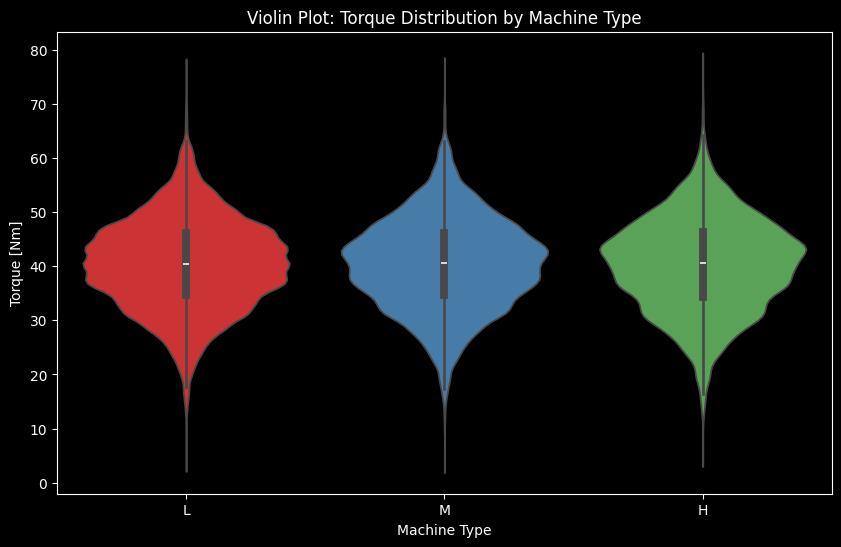

In [50]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Torque [Nm]', data=data, hue='Type', palette='Set1', legend=False)
plt.title('Violin Plot: Torque Distribution by Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Torque [Nm]')

plt.grid(False)  
plt.show()







##### 1. Why did you pick the specific chart?

Answer Here.  

I chose the violin plot because it clearly shows the distribution of torque values across different machine types, highlighting the spread, median, and any potential outliers. It helps compare the differences between machine types in terms of their torque values.


##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

Machines with failures are more likely to operate in the 22-60 Nm torque range, indicating a potential link between mid-range torque values and failure due to overexertion or wear.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

using these insights to optimize machine operations and maintenance practices will not only reduce downtime and failures but also contribute to cost savings and increased productivity.


#### Chart - 9

Machine Failure Distribution

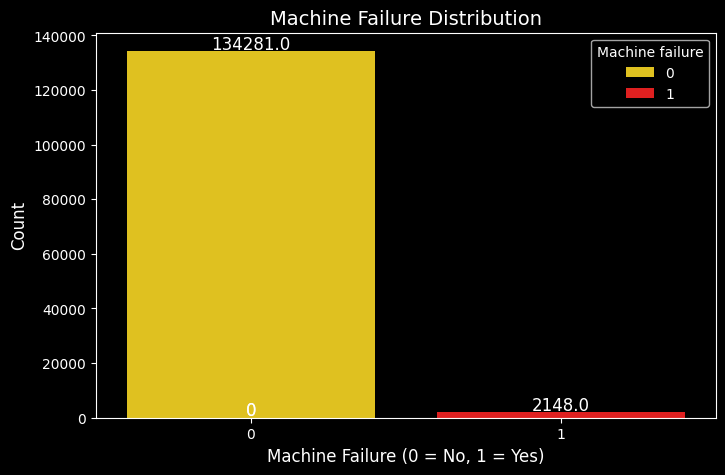

In [51]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Machine failure', data=analysis_data, hue='Machine failure', palette=['gold', 'red'])
plt.title('Machine Failure Distribution', fontsize=14)
plt.xlabel('Machine Failure (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='white',
                xytext=(0, 5), textcoords='offset points')
plt.grid(False)  
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.  

I picked the count plot because it effectively visualizes the distribution of categorical data, specifically showing how many machines have failed (1) vs. not failed (0). It allows easy comparison of the counts, which helps in understanding the frequency of failures in the dataset.









##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

The chart shows that the majority of machines have not failed, with 134,271 instances of no failure (0), and only 2,148 instances of failure (1). This highlights that machine failures are relatively rare in the dataset.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

Yes, the insight that machine failures are rare (only about 2,148 failures out of 136,429 instances) can help prioritize maintenance strategies. By focusing on the small proportion of failures, resources can be allocated more effectively, improving operational efficiency and reducing downtime. This data-driven approach can lead to cost savings and more targeted maintenance efforts, enhancing overall machine reliability and production output.

#### Chart - 10

Machine Failure Proportion

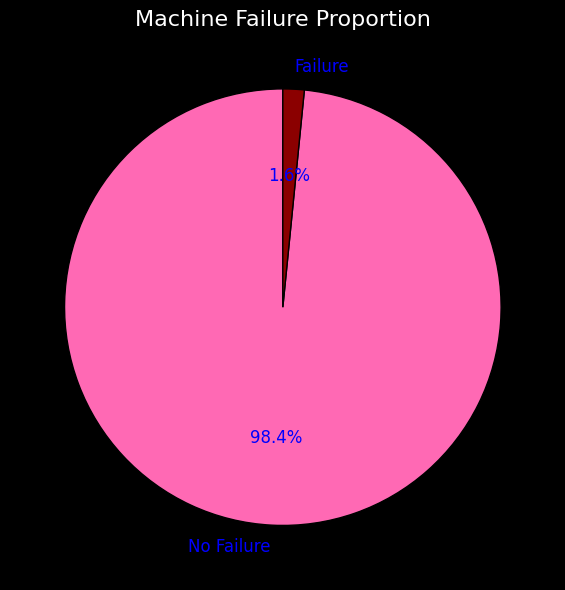

In [52]:
# Count occurrences of Machine Failure (0 = No Failure, 1 = Failure)
failure_counts = analysis_data['Machine failure'].value_counts()

labels = ['No Failure', 'Failure']

plt.figure(figsize=(8, 6))
failure_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', colors=['hotpink', 'darkred'], 
                    startangle=90, wedgeprops={'edgecolor': 'black'}, 
                    textprops={'fontsize': 12, 'color': 'blue'}) 

plt.title('Machine Failure Proportion', fontsize=16)
plt.ylabel('') 
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here. 

I pick pie chart because

* Best for Proportions → A pie chart effectively shows the distribution of machine failures vs. non-failures.
* Quick Comparison → It visually highlights the failure percentage, making it easy to assess machine reliability.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The pie chart reveals that 98.4% of the machines in the dataset did not experience failures, while only 1.6% of the machines had a failure. This suggests that failures are relatively rare events, but even a small percentage of failures could have significant operational and financial implications, making predictive maintenance important.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

Yes! The insights can help:

* Reduce Downtime → Prevent failures and improve machine efficiency.

* Lower Maintenance Costs → Schedule maintenance before failures occur.

* Increase Productivity → Fewer failures mean smoother operations.

* Improve Decision-Making → Data-driven strategies for better machine performance.

#### Chart - 11

Failure Types Contribution to Overall Failures

In [53]:


failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = analysis_data[failure_types].sum()


tree_map_data = pd.DataFrame({
    'Failure Type': failure_types,
    'Count': failure_counts.values,
    'Parent': [''] * len(failure_types)  
})

# Create the tree map
fig = px.treemap(tree_map_data, 
                 path=['Parent', 'Failure Type'], 
                 values='Count', 
                 title="Failure Types Distribution",
                 color='Count', 
                 color_continuous_scale="RdBu")

# Show the plot
fig.show()




##### 1. Why did you pick the specific chart?

Answer Here.  

I chose the tree map because it effectively represents hierarchical data in a visually intuitive way. In this case, it helps to display the contribution of each failure type to the overall failures, showing how each category compares in terms of count. The tree map's nested structure and color gradients make it easy to understand the proportion of each failure type at a glance, offering a clear comparison between them.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

The insights from the tree map are:

Reason for No Failure (RNF) and Operating System Failure (OSF) have the highest contribution to overall failures, indicating that these failure types occur most frequently.

Power Supply Failure (PWF) and Hydraulic Drive Failure (HDF) are less common compared to RNF and OSF, suggesting that efforts to reduce these types of failures may not need as much priority.

Tool Wear Failure (TWF), which refers to failures caused by hydraulic issues, has the lowest contribution, meaning it is less prevalent and may not require as much focus for failure reduction compared to the other failure types.

This insight can guide targeted failure reduction strategies, focusing on the more frequent failure types (RNF and OSF) to improve overall machine reliability.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

The insights gained from analyzing failure types, where RNF, PWF, and TWF occur more frequently, can help prioritize maintenance tasks. By focusing on the failure types that contribute the most to overall failures, businesses can optimize maintenance schedules, improve machine reliability, reduce downtime, and ultimately enhance productivity, leading to a positive business impact.

#### Chart - 12

Feature Importance: Impact on Machine Failure

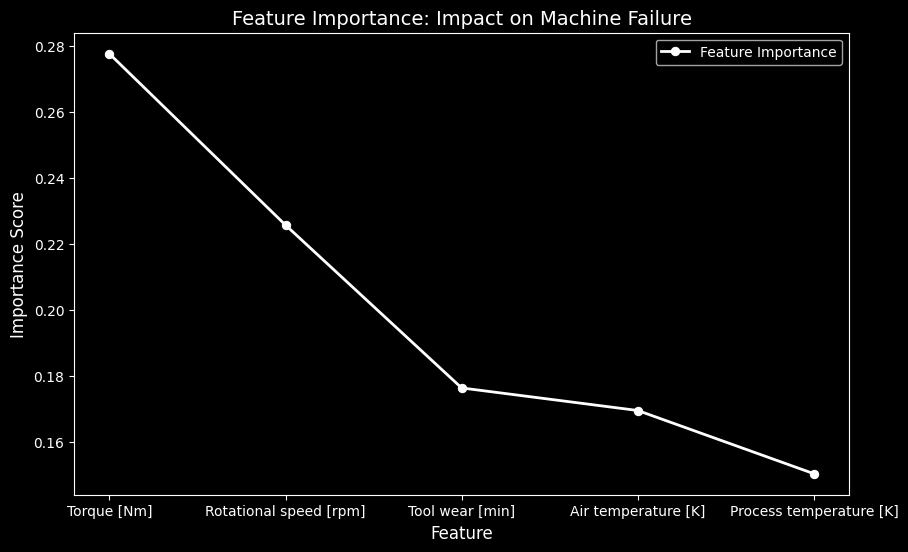

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 'Machine failure' is binary (0 = No failure, 1 = Failure)
data['Machine failure'] = data['Machine failure'].apply(lambda x: 1 if x > 0 else 0)

# Feature selection for model
X = data[['Air temperature [K]', 'Process temperature [K]', 
                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Machine failure']

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)



plt.style.use('dark_background')



plt.figure(figsize=(10, 6))
sns.lineplot(x=feature_importances.index, y=feature_importances.importance, marker='o', color='white', 
             linewidth=2, label='Feature Importance')


plt.title('Feature Importance: Impact on Machine Failure', fontsize=14, color='white')
plt.xlabel('Feature', fontsize=12, color='white')
plt.ylabel('Importance Score', fontsize=12, color='white')

plt.grid(False)

plt.show()






##### 1. Why did you pick the specific chart?

Answer Here.  

I selected a line plot to visualize feature importance because it offers a clear, interpretable way to showcase the impact of each feature on machine failure predictions. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here.  

The insights from the chart are:

* Torque [Nm] is the most significant feature, with the highest importance, meaning it has the greatest influence on predicting machine failure.

* Rotational speed [rpm] follows, indicating it also plays a critical role in the failure prediction model.

* Tool wear [min] is another important factor, contributing to the machine's condition and likelihood of failure.

* Air temperature [K] and Process temperature [K] are less influential but still contribute to the model's accuracy in predicting failures.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

The insights from the Random Forest Classifier, especially the identification of high-impact features like Torque [Nm] and Rotational Speed [rpm], can guide targeted maintenance efforts. Prioritizing these features can reduce machine failures, improve resource allocation, minimize downtime, and enhance overall operational efficiency. This will lead to cost savings and better decision-making in maintenance strategies.

#### Chart - 13

Top 30 Product IDs with the Highest Machine Failures

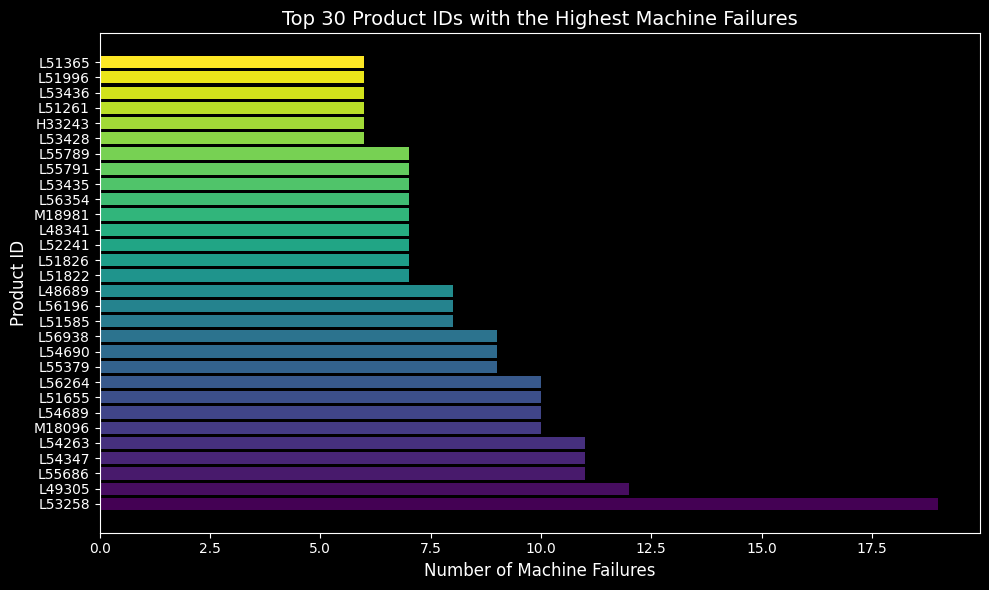

In [55]:

# Group by Product ID and count the number of machine failures (i.e., 'Machine failure' = 1)
failure_counts = df.groupby('Product ID')['Machine failure'].sum().sort_values(ascending=False).head(30)

# Get a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(failure_counts)))

# Plot the top 10 Product IDs with the highest number of machine failures
plt.figure(figsize=(10, 6))
plt.barh(failure_counts.index, failure_counts.values, color=colors)
plt.title('Top 30 Product IDs with the Highest Machine Failures', fontsize=14)
plt.xlabel('Number of Machine Failures', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.grid(False)  
plt.tight_layout()  
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.

I chose the horizontal bar chart because it clearly shows the comparison of machine failures across Product IDs, is easy to read with long labels, and effectively highlights the top products with the most failures using a color gradient.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the chart showing the top 30 Product IDs with the highest machine failures, the following insights can be drawn based on the given product IDs:

Product IDs with the highest machine failures: L53258, L49305, L55686, L54347, L54263, M18096, L54689, L51655, L56264, L55379, L54690, L56938, L51585, L56196, L48689, L51822, L51826, L52241, L48341, M18981.



* Failure-prone Products: Product IDs like L53258, L49305, and L55686 appear to have the highest number of machine failures. These products may require closer monitoring and immediate attention in terms of maintenance.

* Prioritizing Maintenance: Based on this chart, the maintenance team can prioritize the products with the highest failure counts to minimize downtime and improve productivity.



##### 3. Will the gained insights help creating a positive business impact?


Answer Here

The gained insights about prioritizing maintenance tasks and adjusting operational settings will likely create a positive business impact. By addressing the machines with the highest failure rates, the company can allocate resources more effectively and prevent costly failures, reducing downtime and improving production efficiency. Additionally, adjusting operational settings can extend machine lifespans, enhance product quality, and optimize resource allocation. This will ultimately lead to cost savings and higher productivity, contributing to long-term profitability.

#### Chart - 14


Top 20 Products/Machines with the Highest Predicted Failure Probability





Answer Here

Yes, the insights can lead to a positive business impact by enabling targeted maintenance, reducing downtime, and improving product reliability, ultimately resulting in cost savings, enhanced customer satisfaction, and more efficient resource allocation.

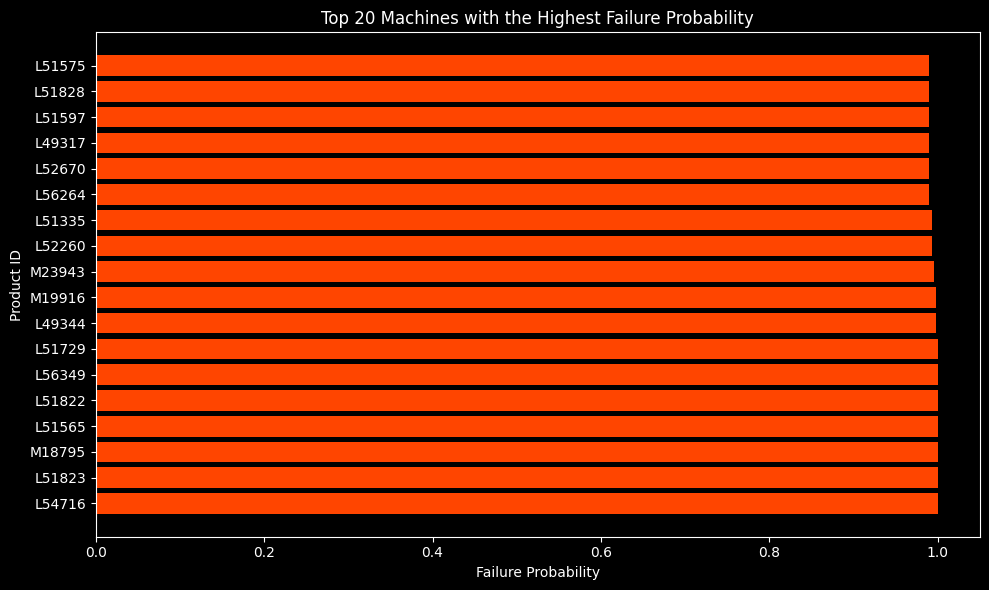

In [56]:

from sklearn.ensemble import RandomForestClassifier

# Assuming df contains the features and the target 'Machine failure'
X = analysis_data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
        'Torque [Nm]', 'Tool wear [min]']]
y = analysis_data['Machine failure']

# Train a Random Forest Classifier model (or load a pre-trained model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict failure probabilities
analysis_data['Failure Probability'] = model.predict_proba(X)[:, 1]  # Get probability of failure (class=1)

# Sort by predicted probability of failure (highest first)
df_sorted = analysis_data.sort_values(by='Failure Probability', ascending=False)

# Plot top machines/products with the highest failure probability
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Product ID'].head(20), df_sorted['Failure Probability'].head(20), color='orangered')
plt.xlabel('Failure Probability')
plt.ylabel('Product ID')
plt.title('Top 20 Machines with the Highest Failure Probability')
plt.grid(False)  
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A horizontal bar chart makes it easier to compare the predicted failure probabilities of different products or machines, especially when dealing with long labels (e.g., Product IDs).


##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The sorted list of Product IDs based on the failure probabilities is:

L54716, L51823, M18795, L51565, L51822, M18795, L56349, L51729, L54716, L49344, M19916, M23943, L52260, L51335, L56264, L52670, L49317, L51597, L51828, L51575

Insights:
Top Product IDs: Products like L54716, L51823, M18795 are at the top, indicating these machines/products are more likely to fail and should be prioritized for maintenance.
Repeated Products: Some products, such as M18795 and L54716, appear multiple times, indicating consistent failure probability and emphasizing the need for their focused maintenance.
Maintenance Prioritization: These IDs can help prioritize maintenance efforts to prevent unplanned downtimes and ensure efficient use of resources.


##### 3. Will the gained insights help creating a positive business impact?


Answer Here.

Yes, the insights gained from this chart can positively impact the business by enabling data-driven decision-making for maintenance scheduling. By prioritizing maintenance tasks based on the likelihood of machine failure, the company can reduce unexpected downtime, improve operational efficiency, and optimize resource allocation, leading to cost savings and increased productivity.

#### Chart - 15

Correlation Heatmap

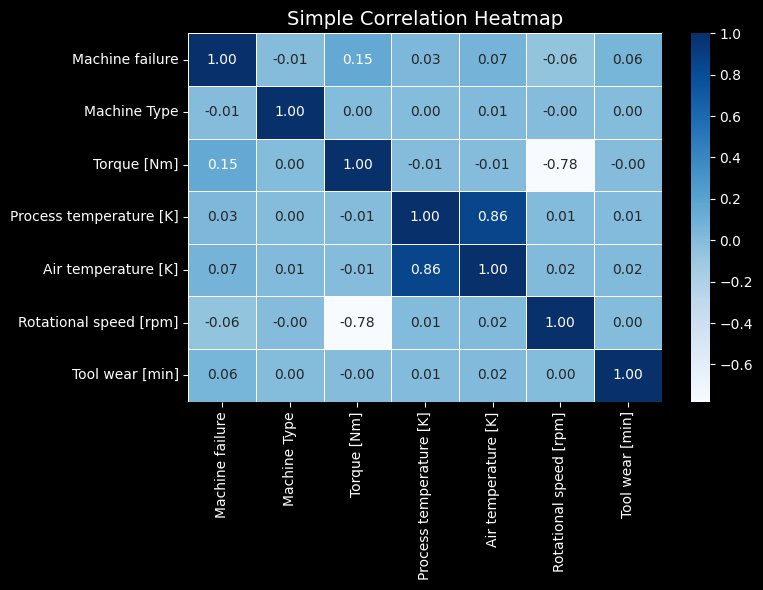

In [57]:

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
analysis_data['Machine Type'] = le.fit_transform(analysis_data['Type'])  

# Calculate correlation matrix for relevant features including 'Machine Type' and 'Machine failure'
corr_matrix = analysis_data[['Machine failure', 'Machine Type', 'Torque [Nm]', 'Process temperature [K]', 
                             'Air temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Simple Correlation Heatmap', fontsize=14)
plt.tight_layout()  
plt.show()





##### 1. Why did you pick the specific chart?

Answer Here.  

I picked the correlation heatmap because it is an effective way to visually represent the relationships between multiple numerical features, especially when trying to identify patterns and interactions between variables. 

##### 2. What is/are the insight(s) found from the chart?

Here’s an updated answer reflecting the revised insights:

* Strong relationship between Air Temperature and Process Temperature: There is a strong positive correlation between Air temperature [K] and Process temperature [K], indicating that changes in one are likely reflected in the other. This suggests that temperature control systems need to be monitored together for optimal performance.

* Torque's Impact on Machine Failure: Torque [Nm] shows a moderate correlation with Machine failure, indicating that higher torque values might contribute to a higher likelihood of machine failure. This highlights the importance of managing torque levels during operation.

* Air Temperature's Role in Machine Failure: Air temperature [K] is also correlated with Machine failure, suggesting that increases in air temperature might contribute to failure. This insight points to the need for better cooling systems and environmental monitoring.

* Rotational Speed's Inverse Relationship with Torque: The correlation between Rotational speed [rpm] and Torque [Nm] is negative, meaning that as the rotational speed increases, torque tends to decrease, and vice versa. This inverse relationship can help optimize machine settings to balance performance and minimize wear.

These insights will aid in designing better maintenance strategies, improving machine reliability, and ensuring optimal operation through environmental and operational adjustments.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here.  

The insights from the correlation analysis can help businesses reduce downtime and maintenance costs by adjusting Air temperature and optimizing Torque. This leads to better production planning, energy efficiency, and cost savings, ultimately increasing productivity and ensuring a more reliable production environment.









#### Chart - 16 - Pair Plot

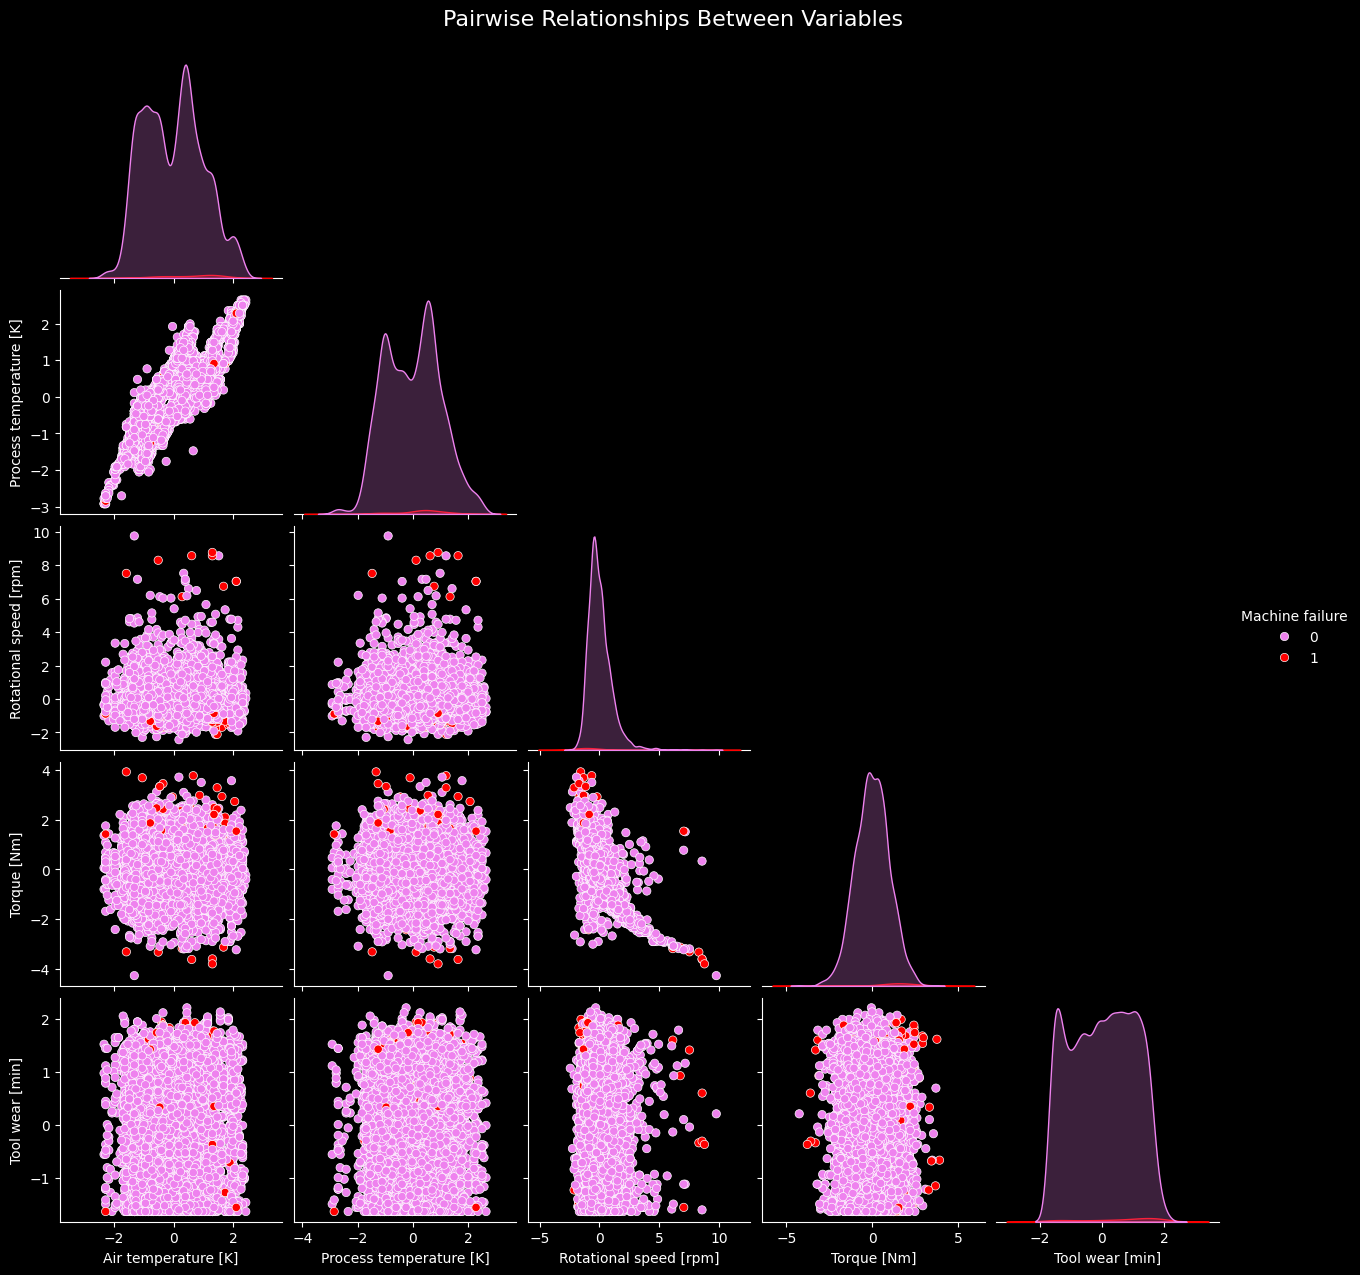

In [58]:

# Sample only 5% of data for faster plotting
df_sample = analysis_data.sample(frac=0.05, random_state=42)

numeric_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 
                   'Tool wear [min]', 'Machine failure']


palette = {0: 'violet', 1: 'red'}
pair_plot = sns.pairplot(df_sample[numeric_columns], hue="Machine failure", corner=True, diag_kind="kde", palette=palette)

# Remove grid from each subplot
for ax in pair_plot.axes.flatten():
    if ax is not None:
        ax.grid(False)


plt.suptitle('Pairwise Relationships Between Variables', fontsize=16, y=1.02)
plt.show()





##### 1. Why did you pick the specific chart?

Answer Here.

 It provides a visual summary of the relationships between multiple variables at once, which is helpful when trying to understand how features interact with each other and with the target variable (machine failure).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The pair plot shows relationships between key variables, with some key insights:

Air and Process Temperature: These two seem to increase together, likely because they’re related to the same machine process.

Rotational Speed and Torque: As rotational speed goes up, torque also tends to go up, but there’s some variation.

Machine Failures: Red dots (machine failures) are spread in different areas, helping to identify conditions that might lead to failures (e.g., high temperatures or tool wear).

Distributions: The diagonal plots show the spread of each variable, helping to see if anything looks unusual.

## **5. Solution to Business Objective**

 Objective  : Machine Data Analysis

 **1  Product ID Prioritization for Maintenance:**

* High Failure Rate Products: Products like L53258, L49305, and L55686 have frequent failures, making them prime candidates for prioritized maintenance to minimize operational downtime.

* Failure-Prone Product IDs: Products like L54716, L51823, and M18795 exhibit high failure probabilities, based on historical failure patterns. These products should be included in the priority maintenance schedules.

* Consistent Failure Patterns: Products like M18795 and L54716 consistently fail, indicating a pattern. These should be monitored continuously for proactive maintenance.

**2 Failure Types and Patterns:**

* Most Common Failure Types: The most prevalent failure types are RNF (Reason for No Failure) and OSF (Operating System Failure). These should be the focus of preventive maintenance strategies to reduce downtime.

* Moderate Contributors: PWF (Power Supply Failure) and HDF (Hydraulic Drive Failure) occur less frequently, so maintenance efforts for these can be prioritized lower.

* Less Common Failures: TWF (Tool Wear Failure) is less prevalent and may not require as much attention for reduction compared to the other failure types, but should still be monitored for tool degradation.

**3 Temperature and Torque Relationships:**

* Air and Process Temperature: A strong positive correlation between Air Temperature [K] and Process Temperature [K] indicates that temperature control systems should be managed together to optimize performance. Operational shifts affecting these temperatures should be closely monitored to avoid operational inefficiencies.

* Torque's Role in Failure: A moderate correlation between Torque [Nm] and Machine Failure suggests that higher torque values could increase the likelihood of failure. Managing torque levels is critical to reducing machine stress and improving reliability.

* Torque and Rotational Speed Inverse Relationship: There is an inverse correlation between Torque and Rotational Speed. As torque increases, rotational speed tends to decrease. This suggests that machines may slow down when higher torque is required to handle greater loads. Understanding this relationship helps optimize operational settings to balance performance and minimize wear.

**4 Machine Type Analysis and Operational Adjustments:**

* Machine Type 'H' (Low Temperature): These machines operate at lower temperatures than expected (below 310K). They are energy-efficient, but need careful monitoring to avoid inefficiencies. 

* Machine Type 'L' (High Temperature): These machines operate at higher temperatures, ideal for demanding tasks but requiring careful temperature management to avoid overheating and excessive maintenance costs.

* Machine Type 'M' (Balanced Temperature): These machines operate around 310K, indicating balanced performance. They are more stable, with lower maintenance requirements, ensuring consistent operation.

**5 Targeted Maintenance Based on Torque Ranges:**

* Failure-Prone Torque Range: Machines with failures often operate in the 22-60 Nm torque range, where excessive wear or overexertion might occur. This range should be closely monitored for operational efficiency.

* Stress Levels: Torque fluctuations in the range of -2 to -4 and 2 to 4 standard deviations indicate varying stress levels. These fluctuations must be managed to ensure stability and prevent machine failure.


# **Conclusion**

The analysis highlights key areas where maintenance efforts should be focused, such as specific product IDs, failure types, and operational features. By prioritizing high-risk machines and addressing failure-prone components, we can significantly reduce downtime, optimize resource allocation, and improve overall productivity. The insights from this report will guide both short-term maintenance planning and long-term machine performance optimization.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***